<a href="https://colab.research.google.com/github/Alone1011/DIF62128_A_25_2311532011_RifkiYuliandra/blob/main/Praktikum_2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

* Import library yang diperlukan





In [2]:
import pandas as pd

# load dataset
dataset_url = 'https://raw.githubusercontent.com/Alone1011/DIF62128_A_25_2311532011_RifkiYuliandra/refs/heads/main/dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Selecting feature

We need to divide the given column into two types of variables dependent (or target variable) and independent variable(or feature variables)

In [5]:
# split dataset in feature and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [6]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


## Spliting data

* Split the dataset by using the function **train_test_split()**
* We need to pass parameters: **feature, target, and tes_set** size
* Bagi dataset menjadi data training (70%) dan data testing (30%)

In [7]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model development and prediction

* Import the LogisticRegression module
* Create a logistic regression classifier object using the LogisticRegression() function
* Fit your model on the train set using fit() and perform prediction on the test set using predict().

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

# predict the model
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Evaluation using Confusion Matrix

Confusion Matrix adalah sebuah tabel yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya dari data uji. Confusion matrix terdiri dari 4 komponen utama:

1. True Positive (TP)
  * Model memprediksi positif dan hasil aslinya memang positif
  * Contoh: Model mendeteksi email sebagai spam, dan memang email itu adalah spam.
2. False Positive (FP)
  * Model memprediksi, tetapi hasil aslinya
3. False Negative (FN)
  * Model memprediksi negatif, tetapi hasil aslinya sebenarnya positif.
  * Contoh: Model mengira email bukan spam, tetap sebenarnya spam.
4. True Negative (TN)
  * Model memprediksi negatif, dan hasil aslinya memang negatif.
  * Contoh: Model mengira email bukan spam, dan memang benar email itu bukan spam.

In [14]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[132,  14],
       [ 36,  49]])

Text(0.5, 427.9555555555555, 'Predicted label')

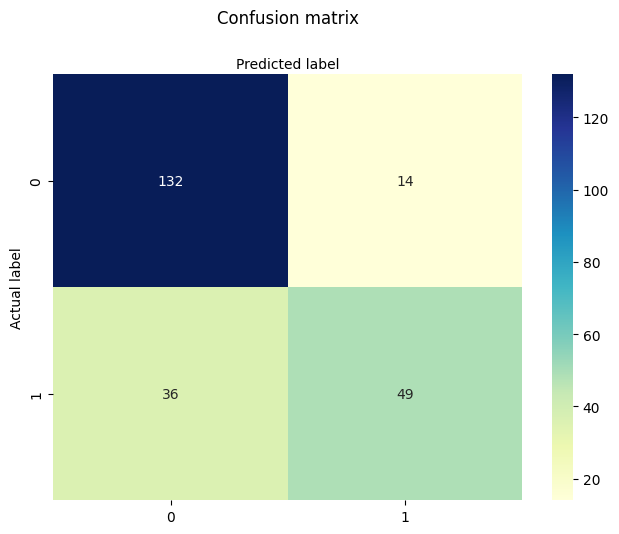

In [16]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion matrix evaluation metrics

Dari confusion matrix, kita bisa menghitung berbagai metrik evaluasi

In [17]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.90      0.84       146
   with diabetes       0.78      0.58      0.66        85

        accuracy                           0.78       231
       macro avg       0.78      0.74      0.75       231
    weighted avg       0.78      0.78      0.78       231



## ROC Curve

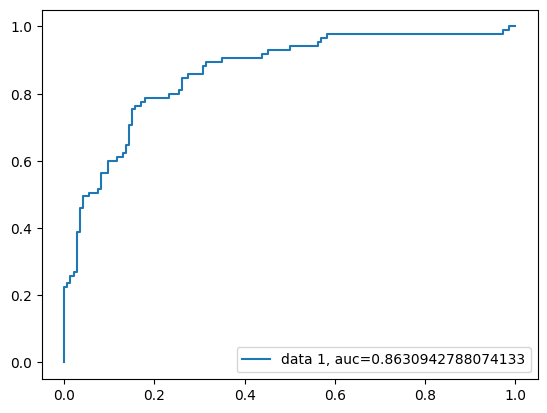

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Area Under Curve (AUC)

* Untuk mempermudah